In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

In [5]:
df_cases.tail(15)

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
79,1019,322,258,6,826,917,1224,3876,335,1934,2665,7,54,1658,15101.0
80,1019,322,260,6,827,917,1245,3892,335,1944,2669,7,54,1659,15156.0
81,1023,323,260,6,828,918,1250,3898,336,1948,2675,7,54,1659,15185.0
82,1029,323,260,6,830,919,1256,3916,337,1957,2685,7,54,1661,15240.0
83,1035,323,260,6,830,919,1259,3934,337,1968,2691,7,54,1665,15288.0
84,1039,325,260,6,831,919,1269,3939,337,1974,2698,8,54,1668,15327.0
85,1058,325,260,6,834,924,1273,3943,337,1984,2706,8,54,1670,15382.0
86,1060,325,260,6,835,928,1274,3946,337,1987,2709,8,54,1671,15400.0
87,1061,325,260,6,836,931,1278,3949,338,1987,2714,8,54,1671,15418.0
88,1061,325,260,6,871,935,1281,3950,338,1995,2716,8,54,1671,15471.0


In [6]:
current_day = df_cases.index[-1]
print("### Time Since Last Doubling ###")
for col in df_cases.columns:
    time_at_half = df_cases[df_cases[col] < (df_cases[col].iloc[-1]/2)].index[-1]
    time_since_doubling = current_day - time_at_half
    
    print(f'{col} : {time_since_doubling} days')

### Time Since Last Doubling ###
Ayrshire and Arran : 51 days
Borders : 60 days
Dumfries and Galloway : 64 days
Eileanan Siar (Western Isles) : 68 days
Fife : 53 days
Forth Valley : 50 days
Grampian : 44 days
Greater Glasgow and Clyde : 49 days
Highland : 54 days
Lanarkshire : 50 days
Lothian : 49 days
Orkney : 65 days
Shetland : 72 days
Tayside : 54 days
Scotland (Total) : 51 days


In [7]:
df_total.tail(10)

,Total Tests,Total Positive Cases,Total Deaths
84,111085,15327,2331
85,112984,15382,2353
86,114322,15400,2362
87,115259,15418,2363
88,116848,15471,2375
89,118573,15504,2386
90,120601,15553,2395
91,122762,15582,2409
92,124543,15603,2415
93,126012,15621,2415


In [51]:
df_total['Total Deaths'].diff().values

<IntegerArray>
[<NA>,    0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    1,    1,
    3,    0,    1,    3,    4,    2,    6,    3,    8,    7,    1,    6,   22,
   28,   29,   46,   46,    2,    2,   74,   70,   81,   48,   47,   24,    9,
   40,   84,   80,   58,   56,   10,   12,   70,   77,   58,   64,   47,   18,
   13,   70,   83,   60,   40,   44,   12,    5,   44,   83,   59,   49,   36,
   10,    5,   50,   61,   34,   46,   41,    9,    2,   29,   50,   37,   24,
   16,    9,    3,   18,   13,   12,   15,   22,    9,    1,   12,   11,    9,
   14,    6,    0]
Length: 94, dtype: Int32

## National Statistics

### total number of cases over time

In [8]:
roll = 7

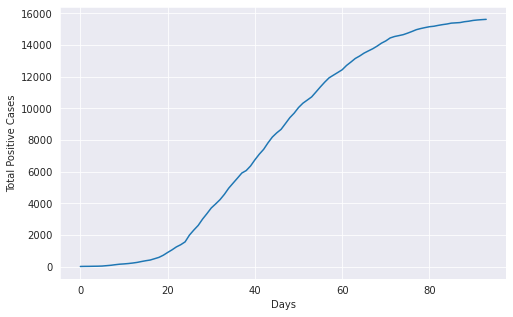

In [9]:
df_total['Total Positive Cases'].plot(figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

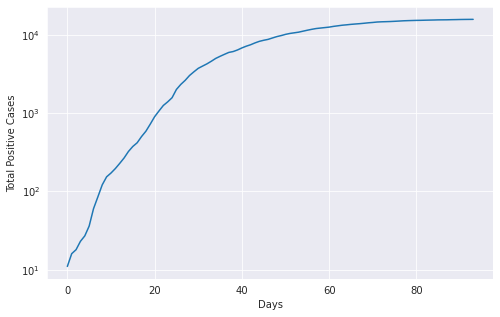

In [10]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

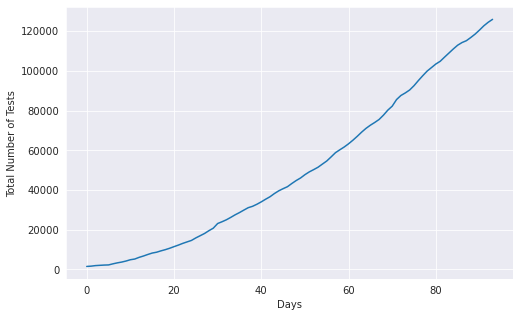

In [11]:
df_total['Total Tests'].plot(figsize=(8, 5))
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [12]:
num_test_per_day = df_total['Total Tests'].diff()
num_test_per_day.loc[0] = df_total['Total Tests'].loc[0]

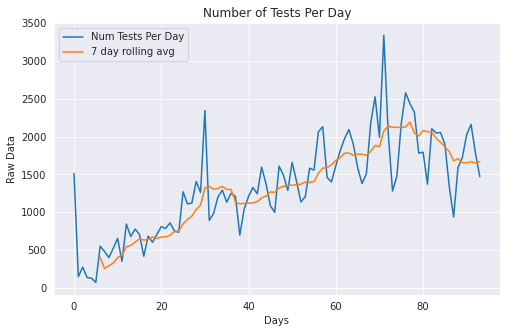

In [13]:
num_test_per_day.plot(figsize=(8, 5), label='Num Tests Per Day')
num_test_per_day.rolling(roll).mean().dropna().plot(label='7 day rolling avg')
plt.title('Number of Tests Per Day')
plt.ylabel('Raw Data')
plt.xlabel('Days')
plt.legend()
plt.show()

### Total number of deaths over time

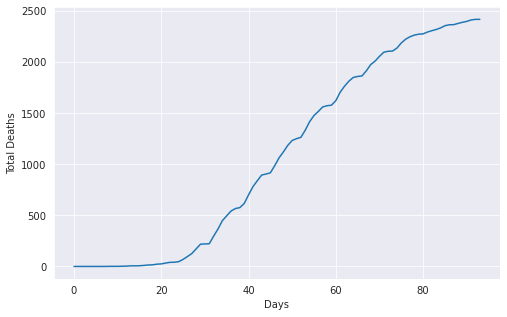

In [14]:
df_total['Total Deaths'].plot(figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

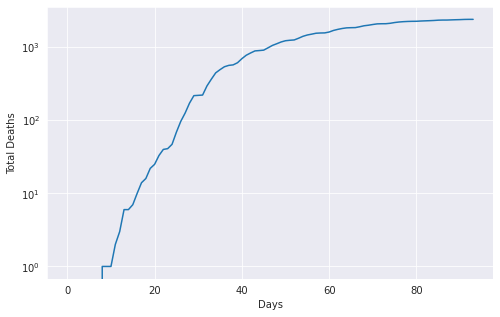

In [15]:
df_total['Total Deaths'].plot(logy=True, figsize=(8, 5))
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

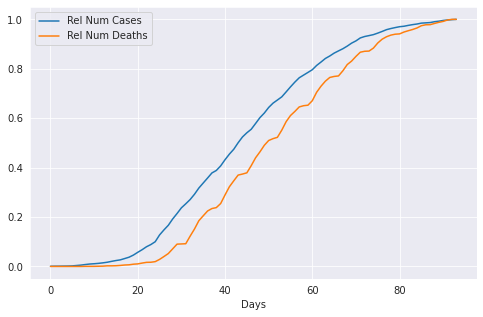

In [16]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

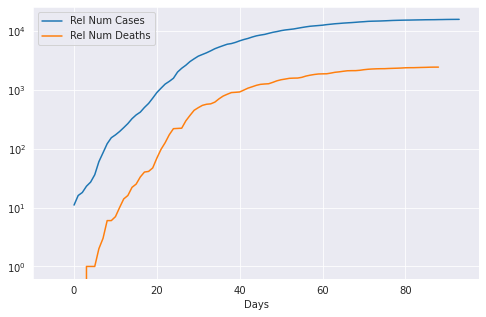

In [17]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 5

rel_cases.plot(logy=True, label='Rel Num Cases', figsize=(8, 5))
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 5-10 days behind cases using this hand-wavy plot argument.

### What is the day-on-day change in number of cases?

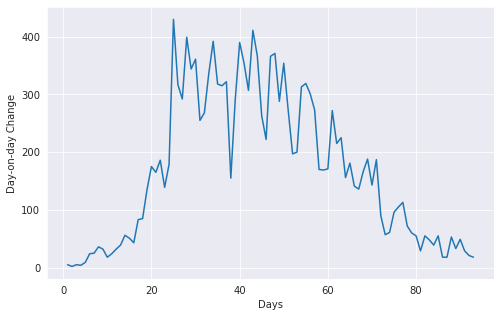

In [18]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Change')
plt.xlabel('Days')
plt.show()

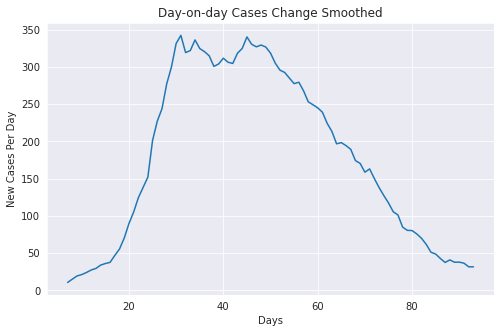

In [19]:
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(figsize=(8, 5))
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change Smoothed')
plt.show()

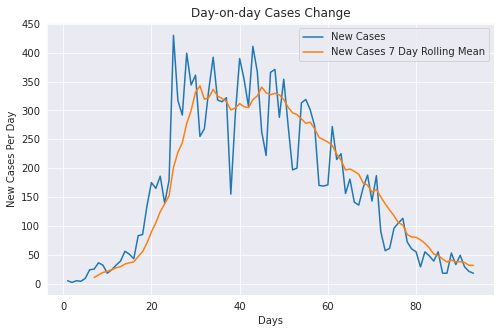

In [20]:
df_total['Total Positive Cases'].diff().dropna().plot(figsize=(8, 5), label='New Cases')
df_total['Total Positive Cases'].diff().dropna().rolling(roll).mean().plot(label='New Cases 7 Day Rolling Mean')
plt.ylabel('New Cases Per Day')
plt.xlabel('Days')
plt.title('Day-on-day Cases Change')
plt.legend()
plt.yticks(np.arange(0, 500, 50))
plt.show()

### What is the day-on-day percentage rise in cases?

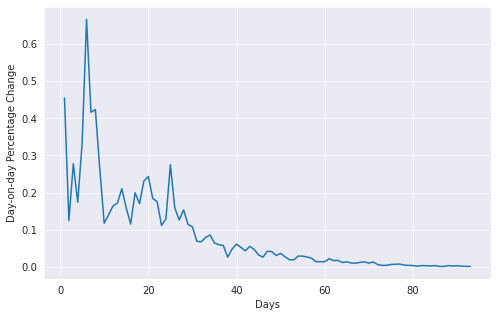

In [21]:
df_total['Total Positive Cases'].pct_change().plot(figsize=(8, 5))
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

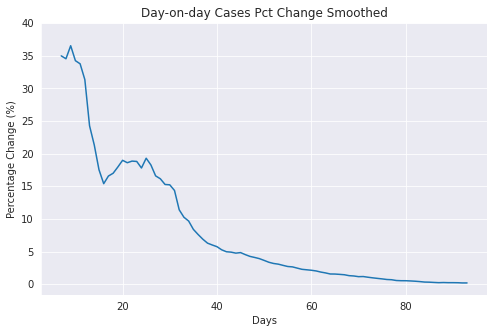

In [22]:
df_total['Total Positive Cases'].pct_change().rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.yticks(np.arange(0, 45, 5))
plt.title('Day-on-day Cases Pct Change Smoothed')
plt.show()

In [23]:
df_total['Total Positive Cases'].pct_change()[-7:]

87    0.001169
88    0.003438
89    0.002133
90    0.003160
91    0.001865
92    0.001348
93    0.001154
Name: Total Positive Cases, dtype: float64

In [24]:
df_total['Total Positive Cases'].pct_change().describe()

count    93.000000
mean      0.086735
std       0.118308
min       0.001154
25%       0.010130
50%       0.032124
75%       0.126407
max       0.666667
Name: Total Positive Cases, dtype: float64

In [25]:
df_cases.pct_change()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
84,0.003865,0.006192,0.000000,0.0,0.001205,0.000000,0.007943,0.001271,0.000000,0.003049,0.002601,0.142857,0.0,0.001802,0.002551
85,0.018287,0.000000,0.000000,0.0,0.003610,0.005441,0.003152,0.001015,0.000000,0.005066,0.002965,0.000000,0.0,0.001199,0.003588
86,0.001890,0.000000,0.000000,0.0,0.001199,0.004329,0.000786,0.000761,0.000000,0.001512,0.001109,0.000000,0.0,0.000599,0.001170
87,0.000943,0.000000,0.000000,0.0,0.001198,0.003233,0.003140,0.000760,0.002967,0.000000,0.001846,0.000000,0.0,0.000000,0.001169
88,0.000000,0.000000,0.000000,0.0,0.041866,0.004296,0.002347,0.000253,0.000000,0.004026,0.000737,0.000000,0.0,0.000000,0.003438
89,0.004713,0.000000,0.000000,0.0,0.005741,0.007487,0.000781,0.001013,0.002959,0.001504,0.002577,0.000000,0.0,0.000000,0.002133
90,0.004690,0.000000,0.003846,0.0,0.001142,0.002123,0.000780,0.001770,-0.002950,0.002002,0.010650,0.000000,0.0,0.000000,0.003160
91,0.004669,0.003077,0.000000,0.0,0.000000,0.002119,0.000779,0.001767,0.000000,0.001499,0.002907,0.000000,0.0,0.001197,0.001865
92,0.000929,0.000000,0.000000,0.0,0.002281,0.000000,0.000000,0.000756,0.002959,0.000998,0.003261,0.000000,0.0,0.001793,0.001348
93,0.001857,0.000000,0.000000,0.0,0.000000,0.000000,0.001558,0.002518,0.000000,0.000498,0.001083,0.000000,0.0,0.000000,0.001154


In [26]:
df_cases.pct_change().rolling(roll).mean()[-10:]

Health Board,Ayrshire and Arran,Borders,Dumfries and Galloway,Eileanan Siar (Western Isles),Fife,Forth Valley,Grampian,Greater Glasgow and Clyde,Highland,Lanarkshire,Lothian,Orkney,Shetland,Tayside,Scotland (Total)
84,0.005345,0.001328,1.663284e-03,0.0,0.000863,0.001567,0.005303,0.003607,0.000852,0.004495,0.003437,0.020408,0.0,0.002337,0.003382
85,0.005959,0.001328,1.663284e-03,0.0,0.001379,0.001401,0.005753,0.002859,0.000852,0.004547,0.003047,0.020408,0.0,0.002160,0.003208
86,0.005666,0.001328,1.107420e-03,0.0,0.001550,0.001707,0.005749,0.002562,0.000852,0.003871,0.002342,0.020408,0.0,0.001117,0.002805
87,0.005801,0.001328,9.516197e-17,0.0,0.001548,0.002169,0.003746,0.002080,0.001276,0.003132,0.002392,0.020408,0.0,0.001030,0.002452
88,0.005240,0.000885,9.516197e-17,0.0,0.007356,0.002627,0.003508,0.001896,0.000849,0.003413,0.002176,0.020408,0.0,0.001030,0.002670
89,0.005076,0.000885,9.516197e-17,0.0,0.007831,0.003541,0.002934,0.001381,0.000847,0.002968,0.002010,0.020408,0.0,0.000858,0.002457
90,0.004913,0.000885,5.494505e-04,0.0,0.007994,0.003844,0.002704,0.000978,0.000425,0.002451,0.003212,0.020408,0.0,0.000514,0.002459
91,0.005027,0.000440,5.494505e-04,0.0,0.007822,0.004147,0.001681,0.001049,0.000425,0.002230,0.003256,0.000000,0.0,0.000428,0.002360
92,0.002548,0.000440,5.494505e-04,0.0,0.007632,0.003370,0.001230,0.001012,0.000848,0.001649,0.003298,0.000000,0.0,0.000513,0.002040
93,0.002543,0.000440,5.494505e-04,0.0,0.007461,0.002751,0.001341,0.001263,0.000848,0.001504,0.003294,0.000000,0.0,0.000427,0.002038


### What is the day-on-day percentage rise in deaths?

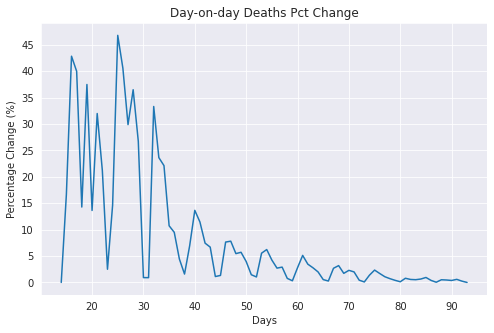

In [27]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 50, 5))
plt.title('Day-on-day Deaths Pct Change')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

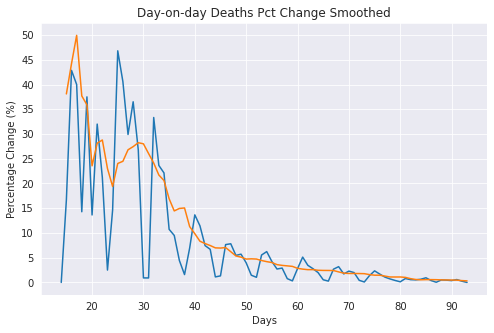

In [28]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].pct_change()
death_pct_change.iloc[14:].mul(100).plot(figsize=(8,5))
death_pct_change.rolling(roll).mean().mul(100).plot(figsize=(8, 5))
plt.yticks(np.arange(0, 55, 5))
plt.title('Day-on-day Deaths Pct Change Smoothed')
plt.ylabel('Percentage Change (%)')
plt.xlabel('Days')
plt.show()

In [29]:
death_pct_change[-10:]

84    0.006477
85    0.009438
86    0.003825
87    0.000423
88    0.005078
89    0.004632
90    0.003772
91    0.005846
92    0.002491
93    0.000000
Name: Total Deaths, dtype: float64

In [30]:
death_pct_change.describe()

count    86.000000
mean           inf
std            NaN
min       0.000000
25%       0.007270
50%       0.027464
75%       0.130885
max            inf
Name: Total Deaths, dtype: float64

### What is the Proportion of Positive Tests?

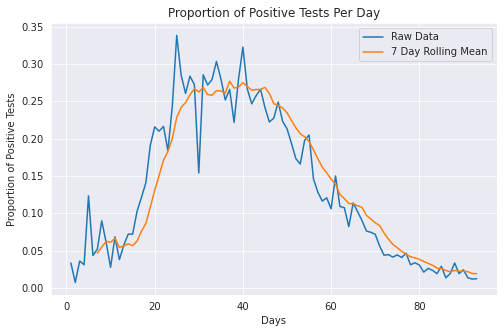

In [31]:
prop_pos = (df_total['Total Positive Cases'].diff() / df_total['Total Tests'].diff())

prop_pos.plot(figsize=(8, 5), label='Raw Data')
prop_pos.rolling(roll).mean().dropna().plot(label='7 Day Rolling Mean')
plt.title('Proportion of Positive Tests Per Day')
plt.ylabel('Proportion of Positive Tests')
plt.xlabel('Days')
plt.legend()
plt.show()

### What is the Day-on-day rise in deaths?

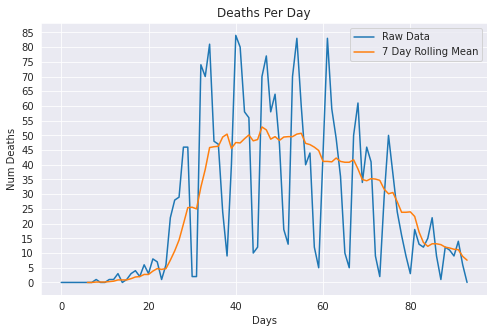

In [32]:
# remove first 13 points because they have nothing
death_per_day = df_total['Total Deaths'].diff().fillna(0)
death_per_day.plot(figsize=(8, 5), label='Raw Data')
death_per_day.rolling(roll).mean().plot(label='7 Day Rolling Mean')
plt.title('Deaths Per Day')
plt.ylabel('Num Deaths')
plt.xlabel('Days')
plt.yticks(np.arange(0, 90, 5))
plt.legend()
plt.show()

## Regional Statistics

### Num Cases Per Region

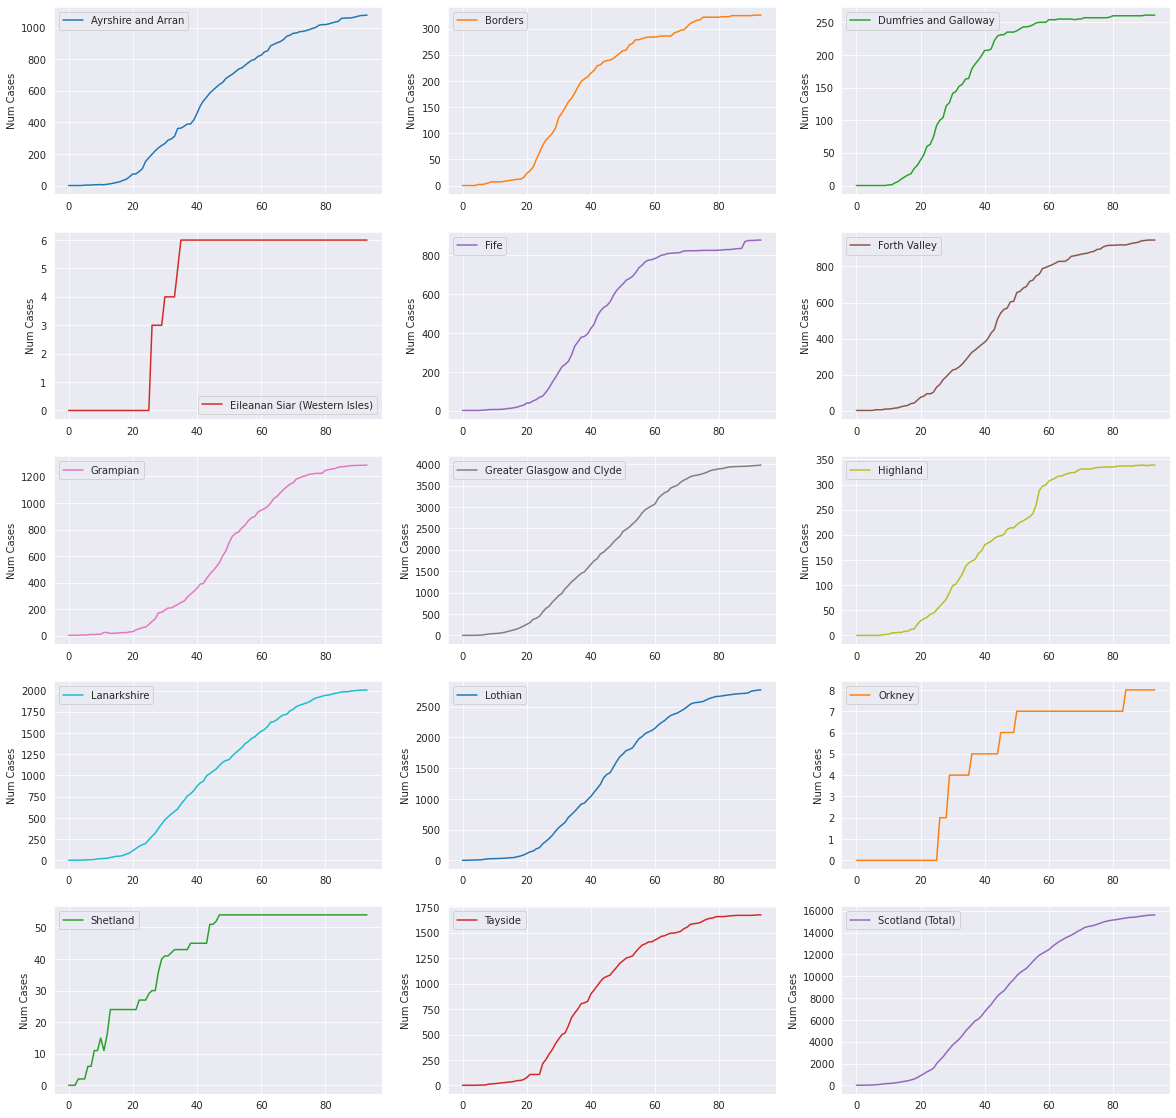

In [33]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

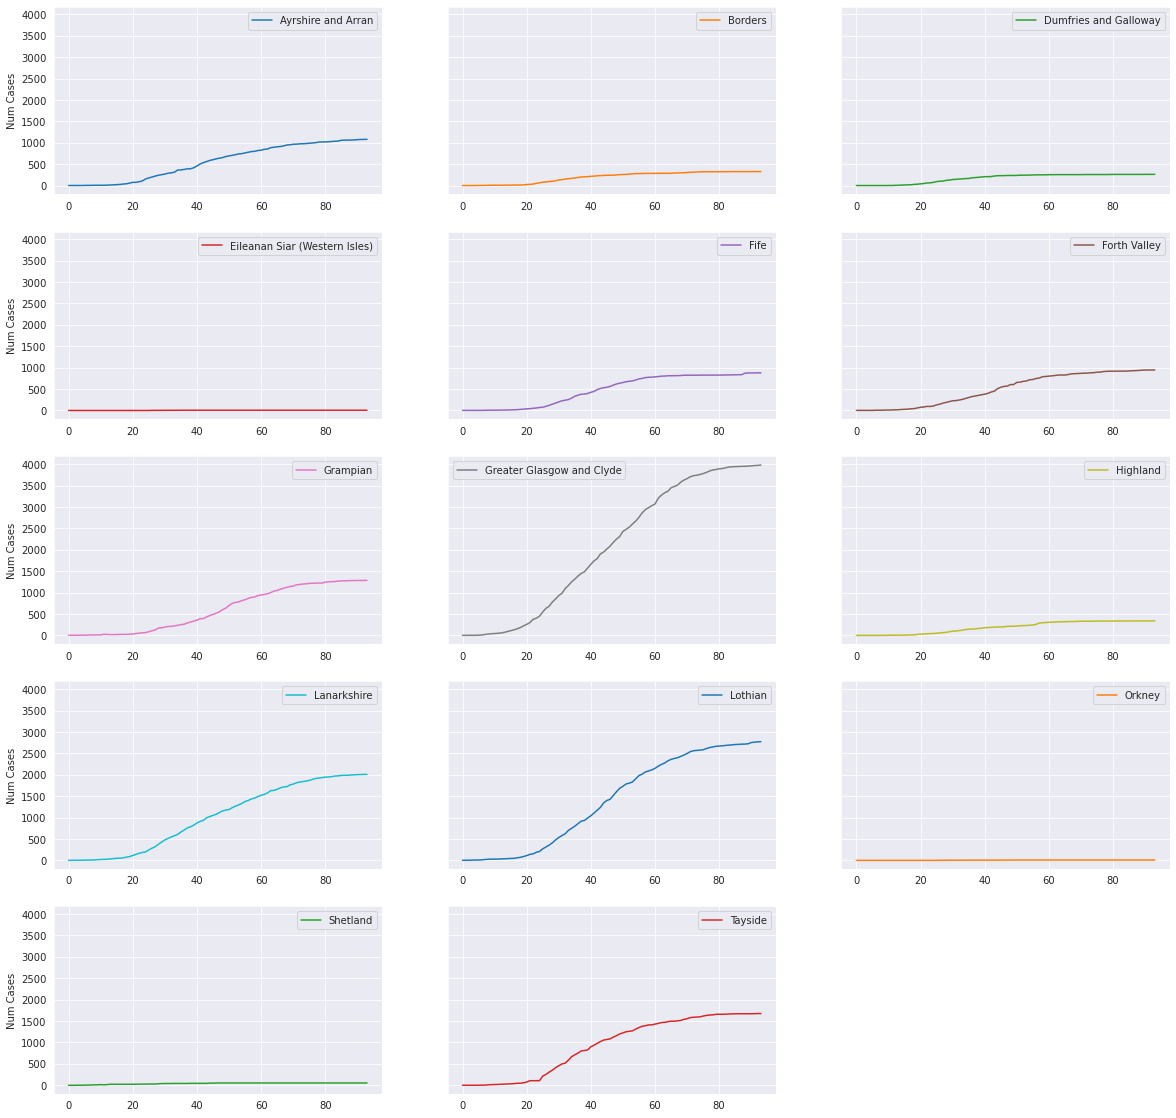

In [34]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [35]:
194 / 178

1.0898876404494382

In [36]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [37]:
df_cases_rel = df_cases / df_pop.values.T * 100000

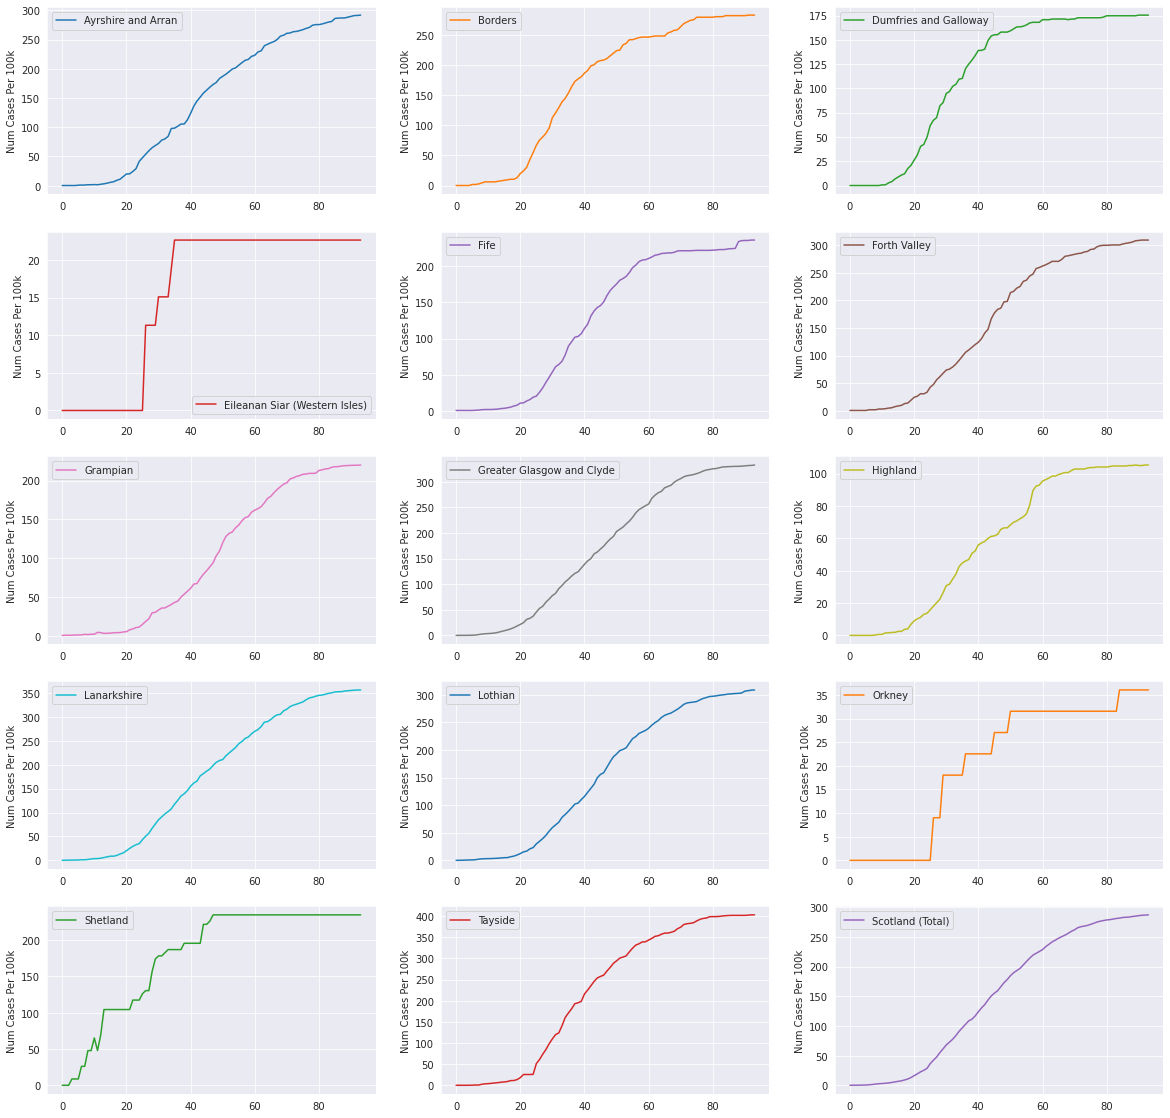

In [38]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

- Same again but sharing the y axis for comparison

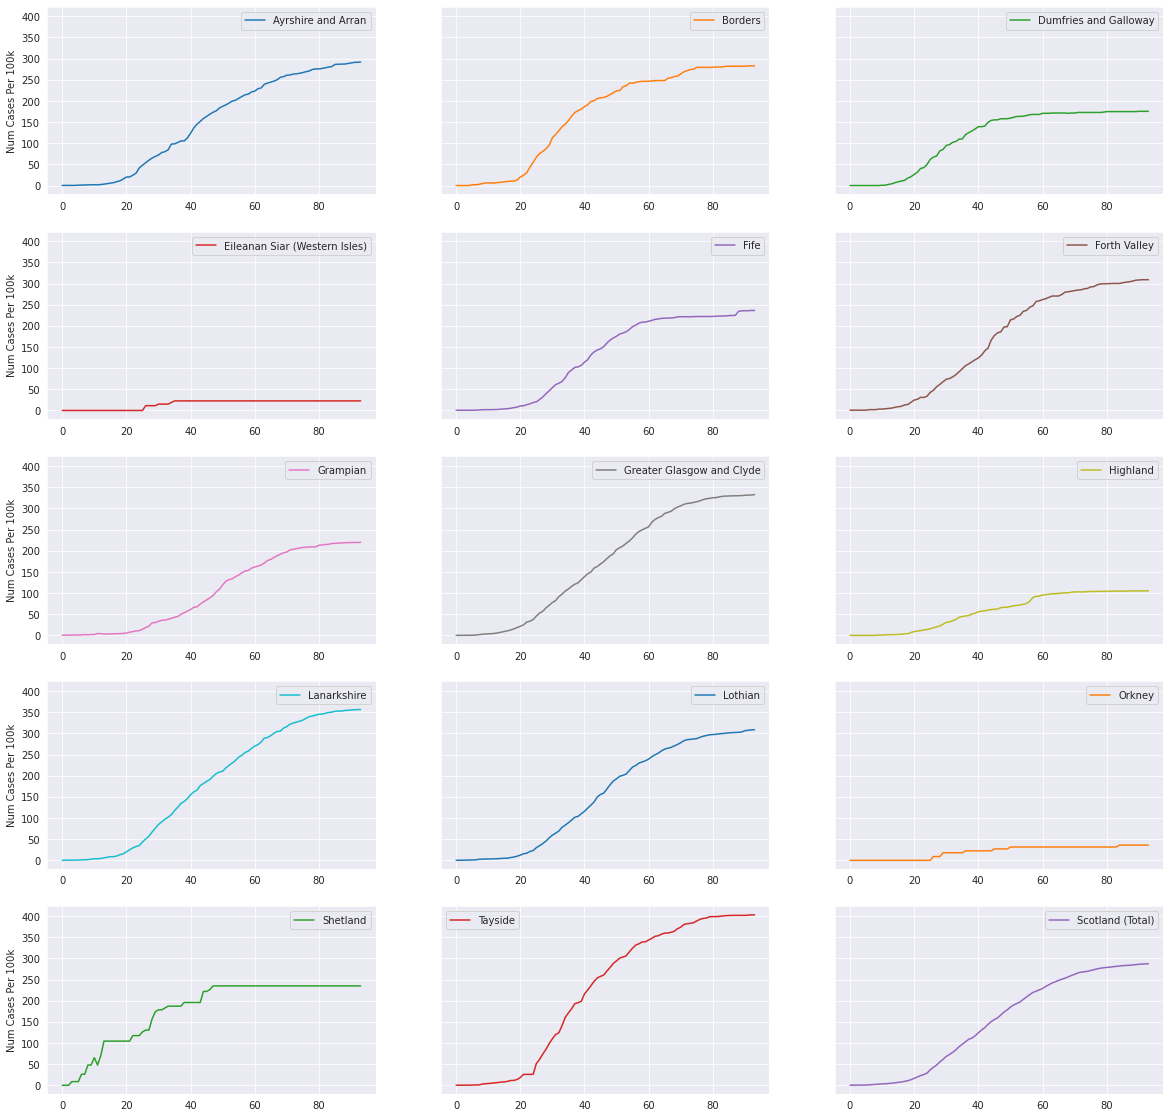

In [39]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

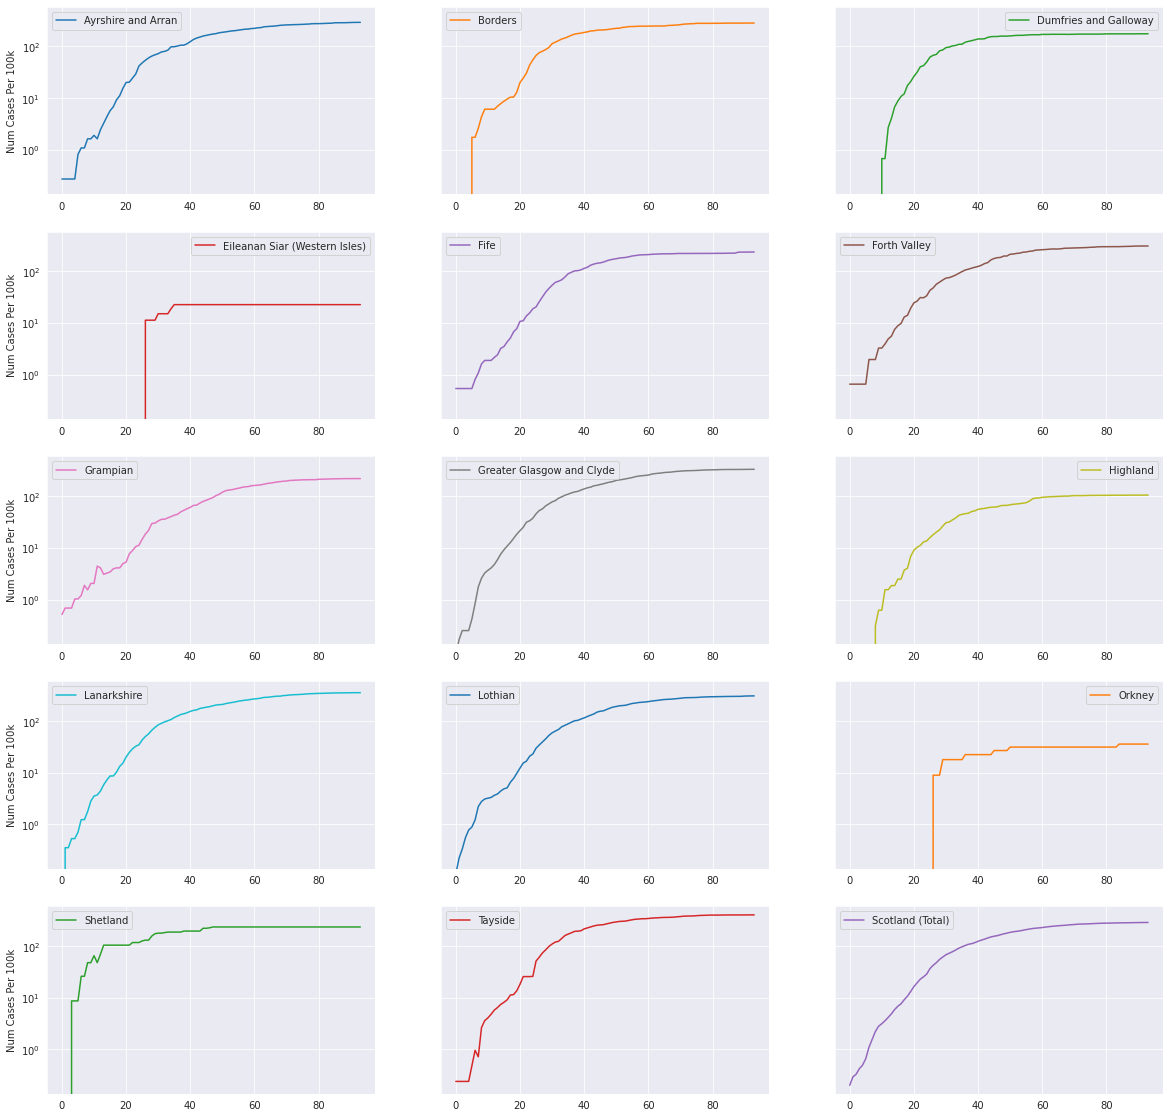

In [40]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False, logy=True)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per 100k')
plt.show()

### Day-on-day Num Cases

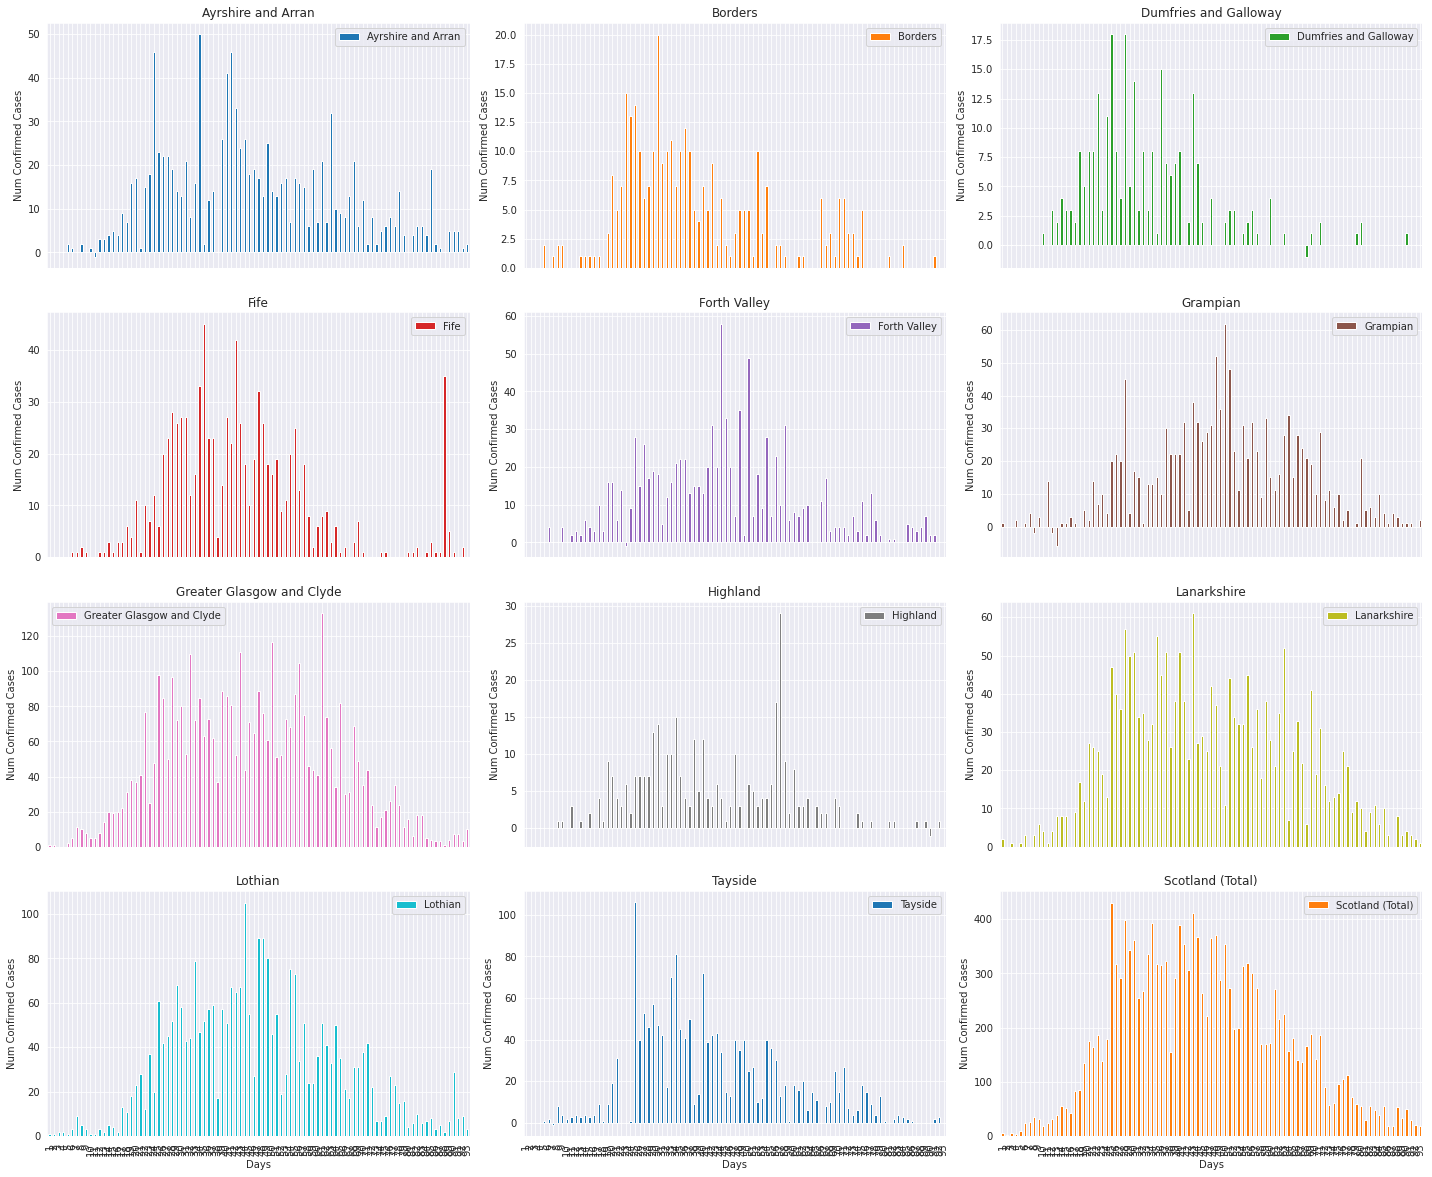

In [41]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

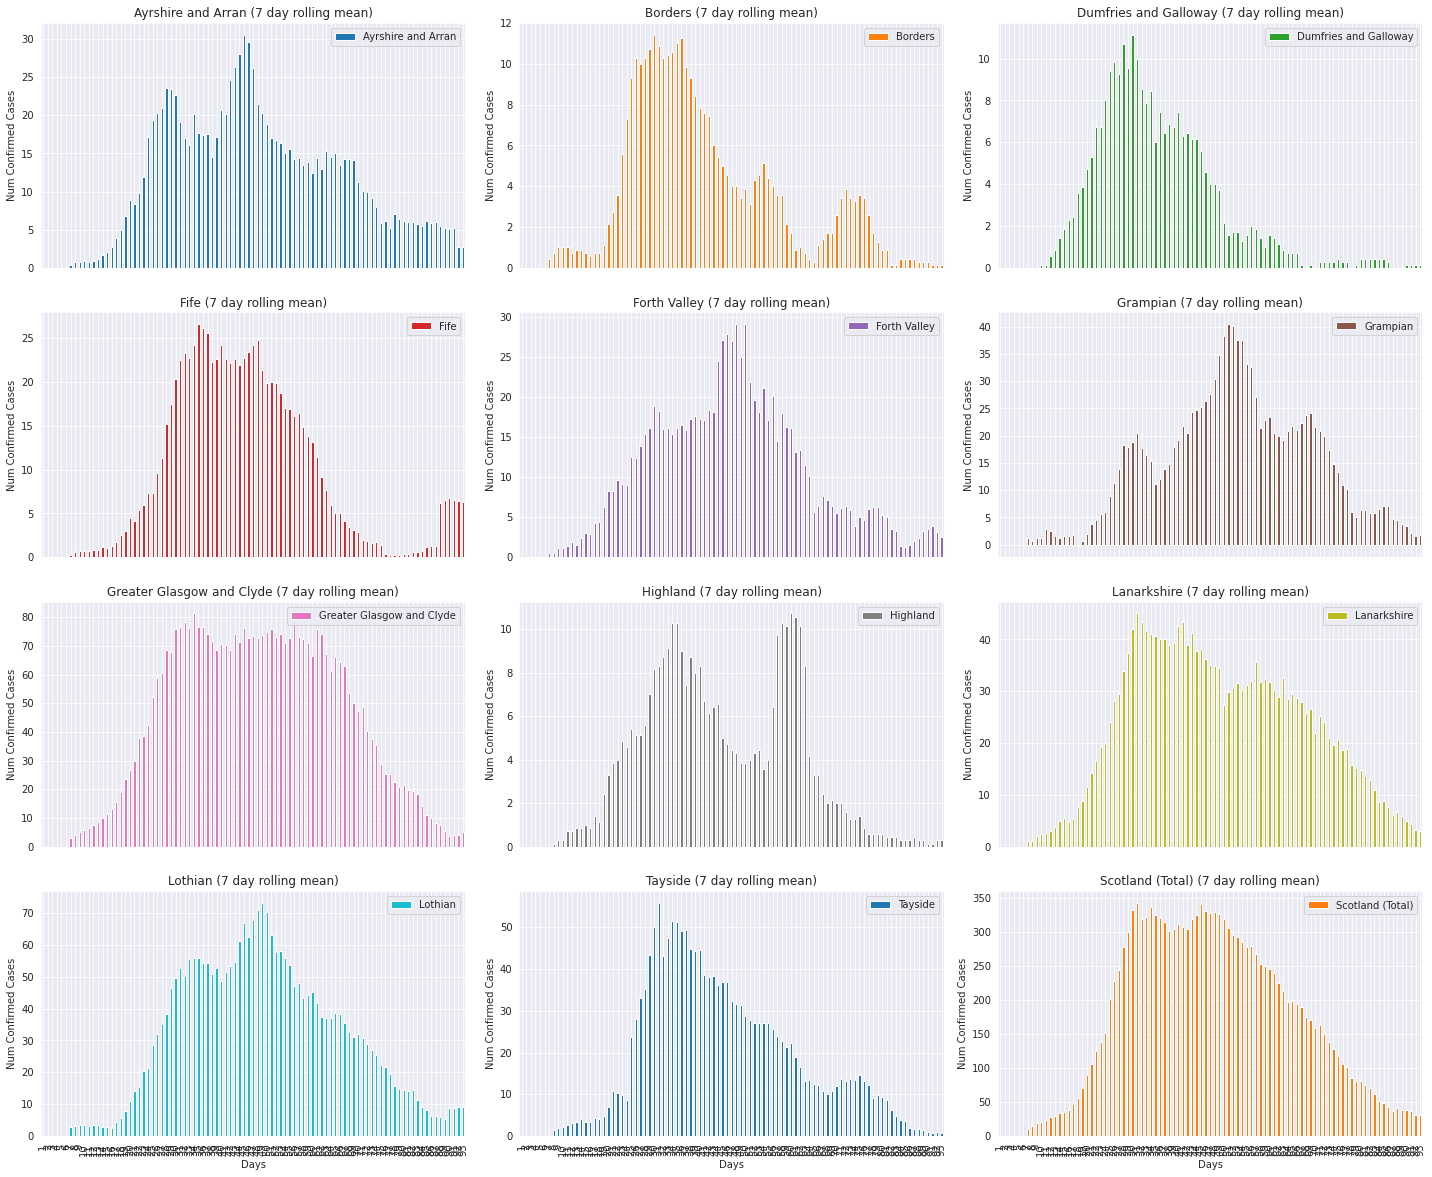

In [42]:
diff_cases = df_cases.drop(columns=['Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna().rolling(roll).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
    ax.set_title(ax.get_title() + f' ({roll} day rolling mean)')
plt.tight_layout()
plt.show()

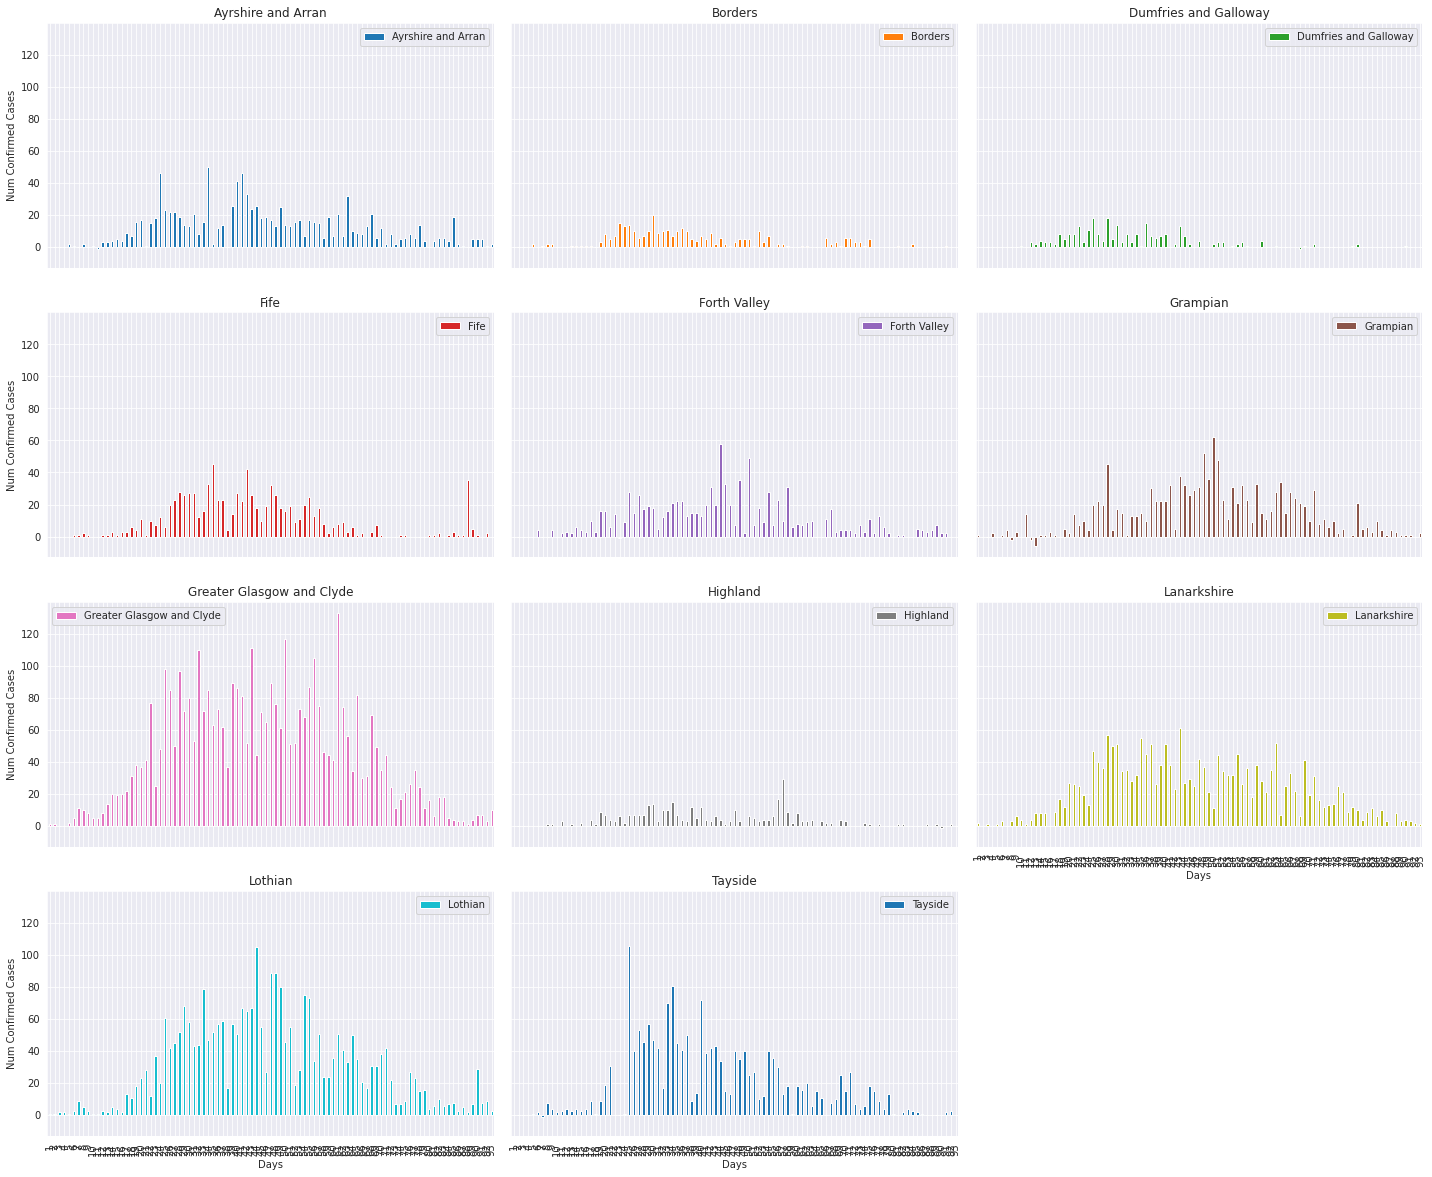

In [43]:
diff_cases = df_cases.drop(columns=['Scotland (Total)', 'Orkney', 'Eileanan Siar (Western Isles)', 'Shetland']).diff().dropna()#.rolling(3).mean()
axes = diff_cases.plot.bar(subplots=True, figsize=(20,20), sharey=True, layout=(5, 3))
for ax in axes.flatten(): 
    ax.set_ylabel('Num Confirmed Cases')
    ax.set_xlabel('Days')
plt.tight_layout()
plt.show()

In [44]:
df_cases.columns

Index(['Ayrshire and Arran', 'Borders', 'Dumfries and Galloway',
       'Eileanan Siar (Western Isles)', 'Fife', 'Forth Valley', 'Grampian',
       'Greater Glasgow and Clyde', 'Highland', 'Lanarkshire', 'Lothian',
       'Orkney', 'Shetland', 'Tayside', 'Scotland (Total)'],
      dtype='object', name='Health Board')

### Log Growth Curves for Each Region

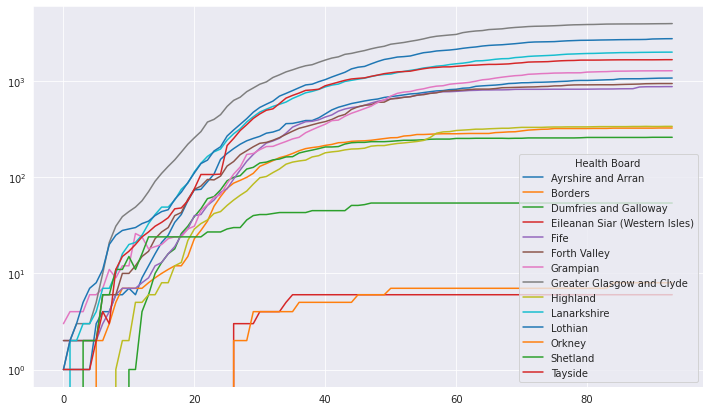

In [45]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

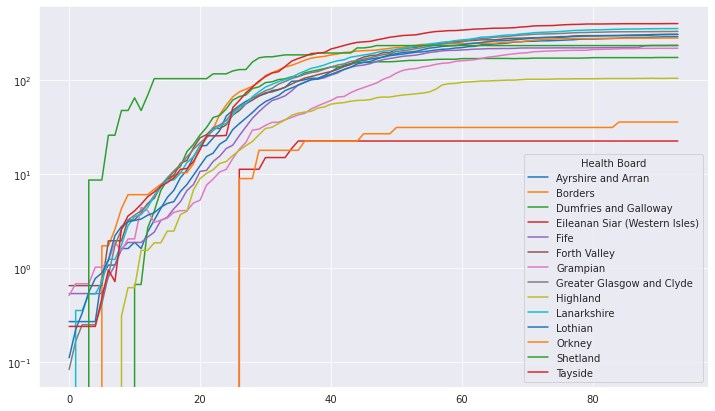

In [46]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()